<a href="https://colab.research.google.com/github/Gul-Fatima/Data-Science/blob/main/SuperMarketSales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Load and Understand the Dataset:

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df = pd.read_csv('sales.csv')

In [48]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [49]:
df.shape

(1000, 17)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

### Initial Observations:

* Columns : 1000, Rows: 17
* Invoice_id = it won't be of any relevance
* Branch are of type A,B,C ; we could use these to find which branch has better sales
* City : it could also be used to predict better sales in which city, 3 unique city
* Customer type : two unique values i.e. Member or Normal
* Gender: Male,Female
* Product Line : 6 unique lines.
* Unit price: price per item
* Quantity: items sold
* tax 5%
* Total : total bill
* Date, Time : these would be irrelevant , unless if we are trying to find the time at which most sales occur
* Payent: 3 types : ewallet, cash, credit card
* cogs: A high COGS reduces profit margins, indicating higher production costs, while a low COGS boosts profit margins, reflecting more cost-efficient operations.
* The Gross Margin Percentage measures the percentage of revenue remaining after deducting the cost of goods sold, indicating profitability and cost efficiency. high:good
* Gross Income is the total revenue from sales minus the cost of goods sold (COGS), representing the profit before accounting for operating expenses, taxes, and other costs.Gross income reflects a company's core profitability; a higher gross income indicates better efficiency in generating profit from sales, while a lower gross income may signal high production costs or pricing issues.
* Rating: min :4 , max: 10


In [51]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [97]:
df.dtypes

,0
Customer type,int64
Gender,int64
Unit price,float64
Quantity,int64
Tax 5%,float64
Total,float64
cogs,float64
gross margin percentage,float64
gross income,float64
Rating,float64


In [52]:
df['Customer type'].unique()

array(['Member', 'Normal'], dtype=object)

In [53]:
df['Branch'].unique()

array(['A', 'C', 'B'], dtype=object)

In [54]:
df['Product line'].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

In [55]:
# Find unique values and sum them up
len( df['Product line'].unique())

6

In [56]:
df['Payment'].unique()

array(['Ewallet', 'Cash', 'Credit card'], dtype=object)

In [57]:
df['City'].unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

# Handling Missing Values:

In [58]:
df.isnull().sum()

,0
Invoice ID,0
Branch,0
City,0
Customer type,0
Gender,0
Product line,0
Unit price,0
Quantity,0
Tax 5%,0
Total,0


In [95]:
df.dtypes

,0
Customer type,int64
Gender,int64
Unit price,float64
Quantity,int64
Tax 5%,float64
Total,float64
cogs,float64
gross margin percentage,float64
gross income,float64
Rating,float64


In [59]:
gender_mapping = {'Male': 0, 'Female': 1}
df['Gender'] = df['Gender'].map(gender_mapping)
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,1,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,1,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,0,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,0,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,0,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [60]:
customerType_mapping = {'Normal': 0, 'Member': 1}
df['Customer type'] = df['Customer type'].map(customerType_mapping)
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,1,1,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,0,1,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,0,0,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,1,0,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,0,0,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [61]:
df = pd.get_dummies(df, columns=['City'], drop_first=False, dtype= int)  # One-hot encode
df.head()

,Invoice ID,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,City_Mandalay,City_Naypyitaw,City_Yangon
0,750-67-8428,A,1,1,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,0,0,1
1,226-31-3081,C,0,1,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,0,1,0
2,631-41-3108,A,0,0,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,0,0,1
3,123-19-1176,A,1,0,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,0,0,1
4,373-73-7910,A,0,0,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,0,0,1


In [62]:
df.drop(columns = ['Invoice ID','Date','Time'],inplace = True)

In [63]:
df.head()

,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating,City_Mandalay,City_Naypyitaw,City_Yangon
0,A,1,1,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1,0,0,1
1,C,0,1,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6,0,1,0
2,A,0,0,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4,0,0,1
3,A,1,0,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8.4,0,0,1
4,A,0,0,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085,5.3,0,0,1


In [64]:
df = pd.get_dummies(df, columns=['Branch','Product line','Payment'], drop_first=False, dtype= int)  # One-hot encode
df.head()

,Customer type,Gender,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,...,Branch_C,Product line_Electronic accessories,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Cash,Payment_Credit card,Payment_Ewallet
0,1,1,74.69,7,26.1415,548.9715,522.83,4.761905,26.1415,9.1,...,0,0,0,0,1,0,0,0,0,1
1,0,1,15.28,5,3.8200,80.2200,76.40,4.761905,3.8200,9.6,...,1,1,0,0,0,0,0,1,0,0
2,0,0,46.33,7,16.2155,340.5255,324.31,4.761905,16.2155,7.4,...,0,0,0,0,0,1,0,0,1,0
3,1,0,58.22,8,23.2880,489.0480,465.76,4.761905,23.2880,8.4,...,0,0,0,0,1,0,0,0,0,1
4,0,0,86.31,7,30.2085,634.3785,604.17,4.761905,30.2085,5.3,...,0,0,0,0,0,0,1,0,0,1


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Customer type                        1000 non-null   int64  
 1   Gender                               1000 non-null   int64  
 2   Unit price                           1000 non-null   float64
 3   Quantity                             1000 non-null   int64  
 4   Tax 5%                               1000 non-null   float64
 5   Total                                1000 non-null   float64
 6   cogs                                 1000 non-null   float64
 7   gross margin percentage              1000 non-null   float64
 8   gross income                         1000 non-null   float64
 9   Rating                               1000 non-null   float64
 10  City_Mandalay                        1000 non-null   int64  
 11  City_Naypyitaw                 

## EDA and Data Visualization:

<ipython-input-66-3ff3077b3859>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Gender', y='Total', data=df, ci=None)


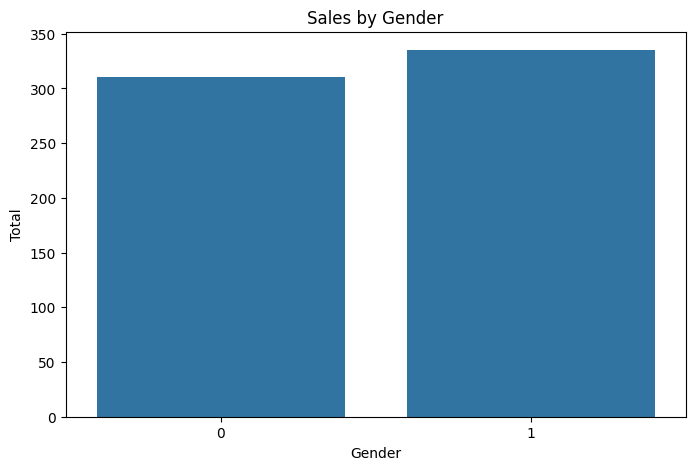

In [66]:
# Sales by Gender
plt.figure(figsize=(8, 5))
sns.barplot(x='Gender', y='Total', data=df, ci=None)
plt.title('Sales by Gender')
plt.show()

* Observation: Male:0, Female:1 , the plt suggest that there were more purchase by females as compared to sales

<ipython-input-86-65190cfa00da>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Rounded Rating', y='Total', data=df, ci=None)


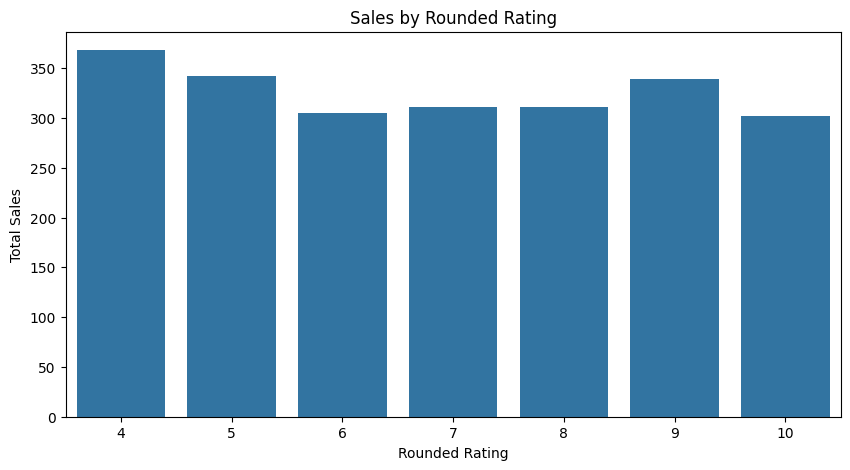

In [86]:
df['Rounded Rating'] = df['Rating'].round().astype(int)
# The bar plot
plt.figure(figsize=(10, 5))
sns.barplot(x='Rounded Rating', y='Total', data=df, ci=None)
plt.title('Sales by Rounded Rating')
plt.ylabel('Total Sales')
plt.xlabel('Rounded Rating')
plt.show()

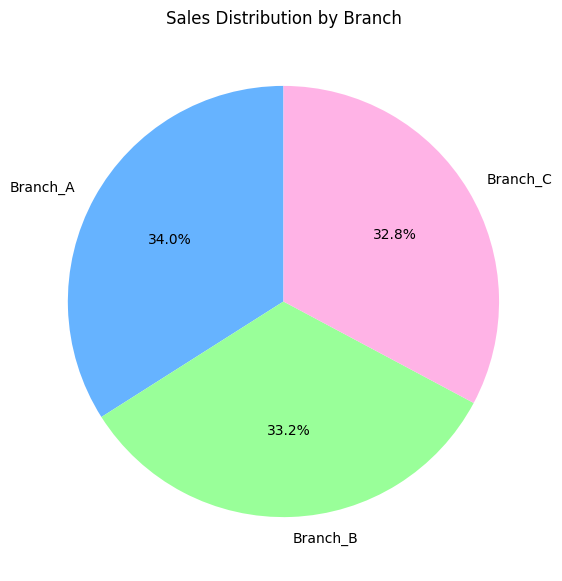

In [82]:
branch_sales = {
    'Branch_A': df['Branch_A'].sum(),
    'Branch_B': df['Branch_B'].sum(),
    'Branch_C': df['Branch_C'].sum()
}
plt.figure(figsize=(7, 7))
plt.pie(branch_sales.values(), labels=branch_sales.keys(), autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99','#ffb3e6'])
plt.title('Sales Distribution by Branch')
plt.ylabel('')
plt.show()


* Observations: Although there isn't much difference sales across three, however branch_A leads then branch_B and thenbranche_C,

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Customer type                        1000 non-null   int64  
 1   Gender                               1000 non-null   int64  
 2   Unit price                           1000 non-null   float64
 3   Quantity                             1000 non-null   int64  
 4   Tax 5%                               1000 non-null   float64
 5   Total                                1000 non-null   float64
 6   cogs                                 1000 non-null   float64
 7   gross margin percentage              1000 non-null   float64
 8   gross income                         1000 non-null   float64
 9   Rating                               1000 non-null   float64
 10  City_Mandalay                        1000 non-null   int64  
 11  City_Naypyitaw                 

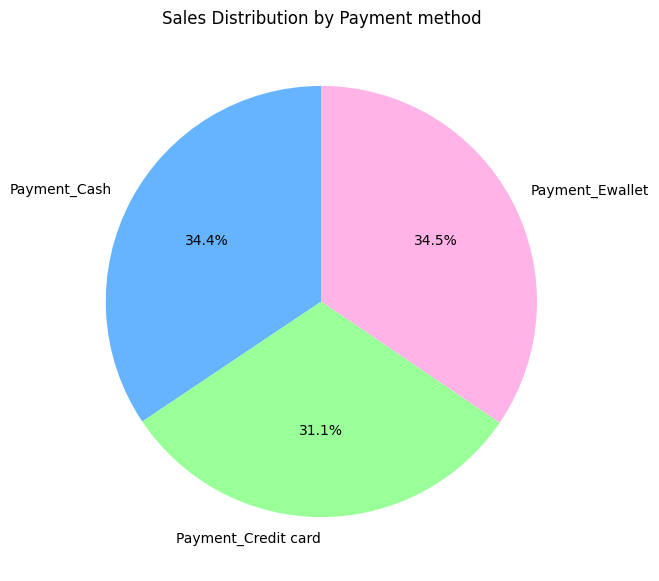

<ipython-input-81-b0701a3f7cb1>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Payment Method', y='Total Sales', data=payment_sales_df, palette='viridis')


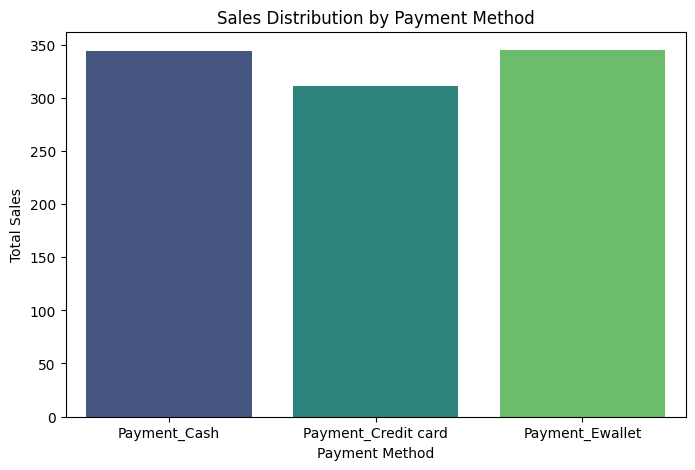

In [81]:
import matplotlib.pyplot as plt

# Assuming the columns are named Branch_A, Branch_B, Branch_C, and you want to sum the sales for each
payment_sales = {
    'Payment_Cash': df['Payment_Cash'].sum(),
    'Payment_Credit card': df['Payment_Credit card'].sum(),
    'Payment_Ewallet': df['Payment_Ewallet'].sum()
}

# Create a pie chart
plt.figure(figsize=(7, 7))
plt.pie(payment_sales.values(), labels=payment_sales.keys(), autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99','#ffb3e6'])
plt.title('Sales Distribution by Payment method')
plt.show()

payment_sales_df = pd.DataFrame(list(payment_sales.items()), columns=['Payment Method', 'Total Sales'])

# Create a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Payment Method', y='Total Sales', data=payment_sales_df, palette='viridis')
plt.title('Sales Distribution by Payment Method')
plt.ylabel('Total Sales')
plt.xlabel('Payment Method')
plt.show()

* Observations: The figure suggest most customer prefers using Ewallet for payment , then cash and then credit card payment is preferred

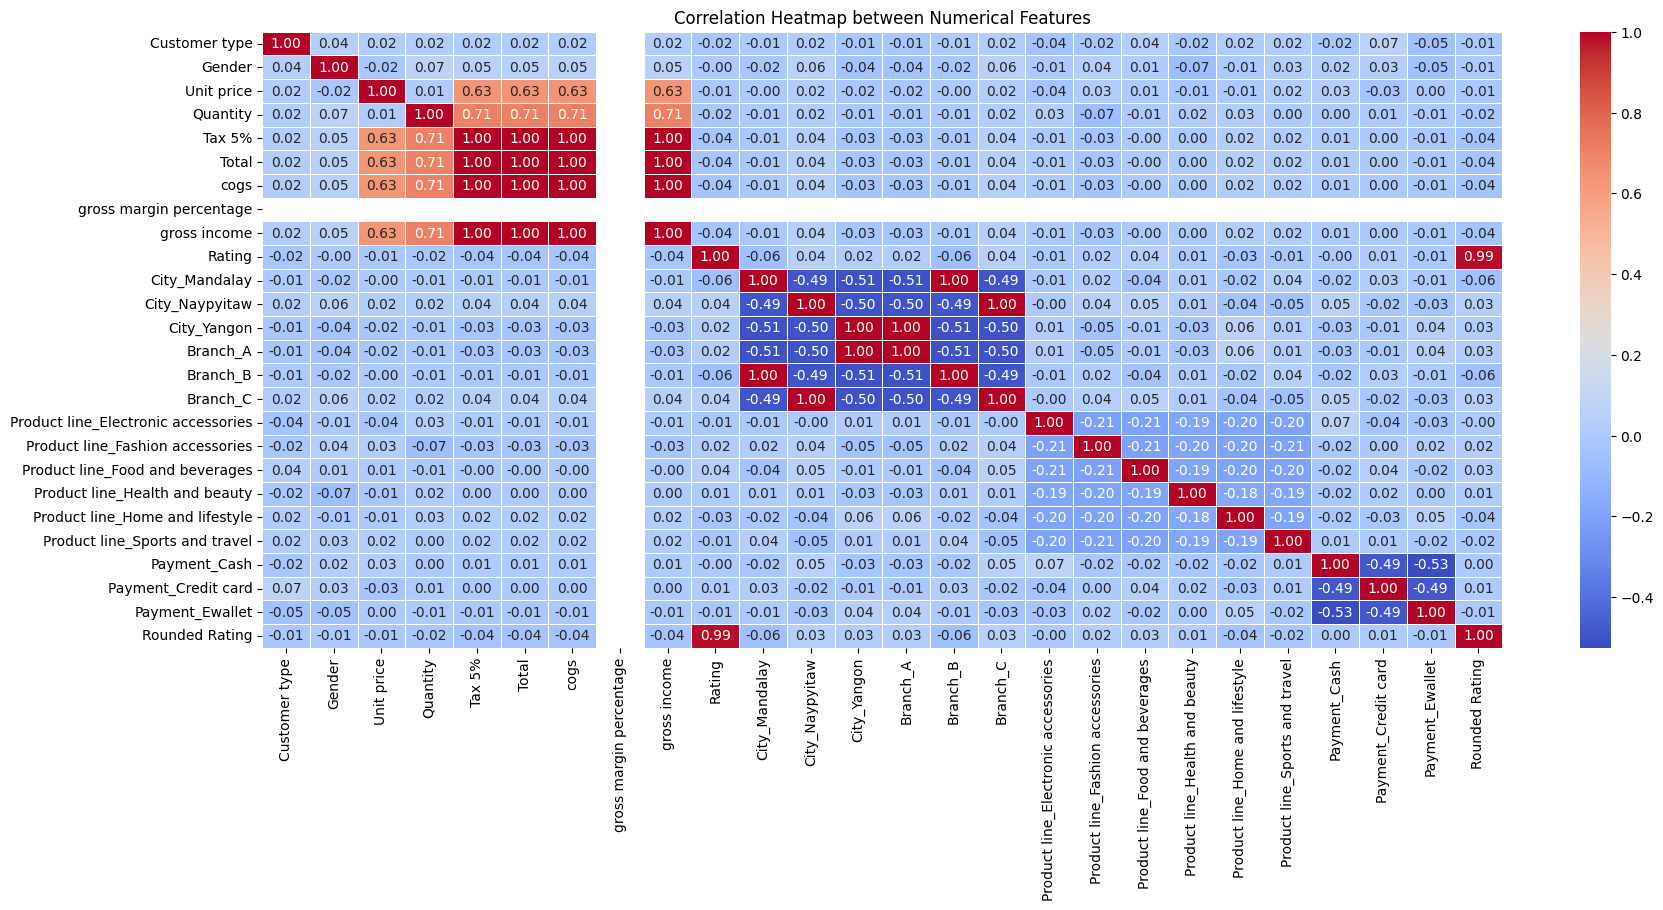

In [93]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df[numerical_cols].corr()
# The heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap between Numerical Features')
plt.show()


<ipython-input-98-1b32ae442327>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Total', data=df, palette='Set2')


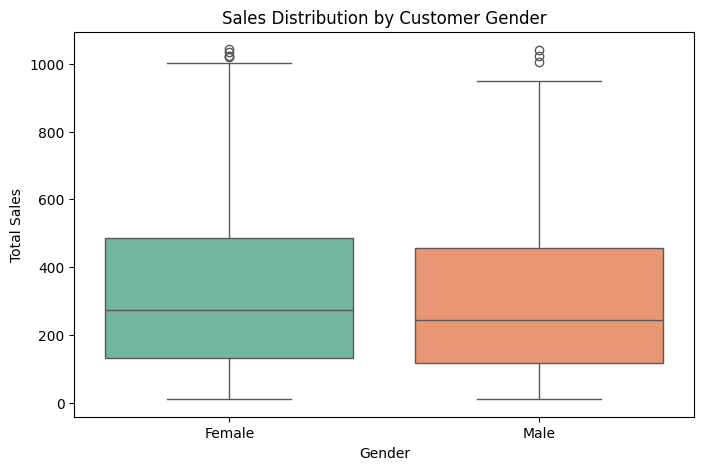

In [98]:
#remapping gender to object type for box plot
df['Gender'] = df['Gender'].map({0: 'Male', 1: 'Female'})

# The boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x='Gender', y='Total', data=df, palette='Set2')
plt.title('Sales Distribution by Customer Gender')
plt.xlabel('Gender')
plt.ylabel('Total Sales')
plt.show()


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Customer type                        1000 non-null   int64  
 1   Gender                               1000 non-null   object 
 2   Unit price                           1000 non-null   float64
 3   Quantity                             1000 non-null   int64  
 4   Tax 5%                               1000 non-null   float64
 5   Total                                1000 non-null   float64
 6   cogs                                 1000 non-null   float64
 7   gross margin percentage              1000 non-null   float64
 8   gross income                         1000 non-null   float64
 9   Rating                               1000 non-null   float64
 10  City_Mandalay                        1000 non-null   int64  
 11  City_Naypyitaw                 